In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
data=pd.read_csv("/content/AAPL.csv",usecols=[1])

In [0]:
dataset = data.values
dataset = dataset.astype('float32')

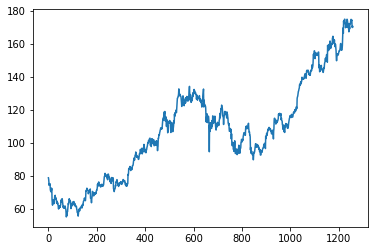

In [14]:
plt.plot(data["Open"])
plt.show()

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler=MinMaxScaler(feature_range=(0,1))
dataset=scaler.fit_transform(dataset)

In [97]:
type(dataset)

numpy.ndarray

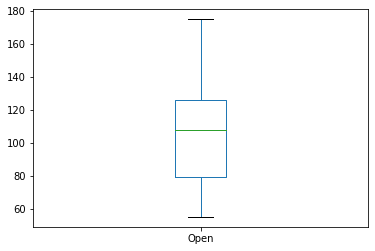

In [30]:
data["Open"].plot.box()

In [0]:
def create_dataset(dataset, look_back=0):
	dataX, dataY = [], []
	for i in range(look_back,len(dataset)):
		a = dataset[i-look_back:i]
		dataX.append(a)
		dataY.append(dataset[i])
	return np.array(dataX), np.array(dataY)

In [0]:
X,y = create_dataset(dataset,look_back=60)

In [0]:
X=X.reshape(X.shape[0],60,1)

In [48]:
X.shape

(1199, 60, 1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(60, 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(1))

In [0]:
#loss=tf.keras.losses.Huber()

In [0]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [52]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 60, 50)            10400     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_11 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 50)               

In [53]:
model.fit(X,y, epochs = 10, batch_size = 32)

Epoch 1/10
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0357
Epoch 2/10
1199/1199 [==============================] - 5s 4ms/step - loss: 0.0050
Epoch 3/10
1199/1199 [==============================] - 5s 4ms/step - loss: 0.0045
Epoch 4/10
1199/1199 [==============================] - 5s 4ms/step - loss: 0.0048
Epoch 5/10
1199/1199 [==============================] - 5s 4ms/step - loss: 0.0049
Epoch 6/10
1199/1199 [==============================] - 5s 4ms/step - loss: 0.0047
Epoch 7/10
1199/1199 [==============================] - 5s 4ms/step - loss: 0.0041
Epoch 8/10
1199/1199 [==============================] - 5s 4ms/step - loss: 0.0040
Epoch 9/10
1199/1199 [==============================] - 5s 4ms/step - loss: 0.0042
Epoch 10/10
1199/1199 [==============================] - 5s 4ms/step - loss: 0.0035


In [0]:
tdata=pd.read_csv("/content/AAPL (1).csv",usecols=[1])

In [55]:
tdata.columns

Index(['Open'], dtype='object')

In [0]:
apple_total = pd.concat((data['Open'], tdata['Open']), axis=0)

In [0]:
test_inputs = apple_total[len(apple_total) - len(tdata) - 60:]

In [76]:
(test_inputs).values

array([154.179993, 154.970001, 155.809998, 156.059998, 155.970001,
       156.350006, 156.729996, 157.899994, 159.779999, 160.419998,
       156.75    , 156.610001, 156.889999, 156.289993, 156.910004,
       157.229996, 159.289993, 163.889999, 167.899994, 169.869995,
       166.600006, 174.      , 172.369995, 173.910004, 174.660004,
       175.110001, 175.110001, 173.5     , 173.039993, 169.970001,
       171.179993, 171.039993, 170.289993, 170.779999, 173.360001,
       175.100006, 175.050003, 174.300003, 172.630005, 170.429993,
       169.949997, 172.479996, 169.059998, 167.5     , 169.029999,
       170.490005, 169.199997, 172.149994, 172.5     , 172.399994,
       173.630005, 174.880005, 175.029999, 174.869995, 174.169998,
       174.679993, 170.800003, 170.100006, 171.      , 170.520004,
       170.160004, 172.529999, 172.539993, 173.440002, 174.350006,
       174.550003, 173.160004, 174.589996, 176.179993, 177.899994,
       176.149994, 179.369995, 178.610001, 177.300003, 177.300

In [0]:
tdataset = test_inputs.values
tdataset = tdataset.astype('float32')

In [0]:
tdataset=tdataset.reshape(80,1)

In [0]:
scaler=MinMaxScaler(feature_range=(0,1))
tdataset=scaler.fit_transform(tdataset)

In [103]:
len(tdataset)

80

In [0]:
Xt,yt = create_dataset(tdataset,look_back=60)

In [0]:
Xt=Xt.reshape(Xt.shape[0],60,1)

In [0]:
pred=model.predict(Xt)

In [107]:
max(pred)

array([0.8247867], dtype=float32)

In [0]:
yhat = scaler.inverse_transform(pred)

In [114]:
max(yhat)

array([174.95638], dtype=float32)

In [0]:
yt = scaler.inverse_transform(yt)

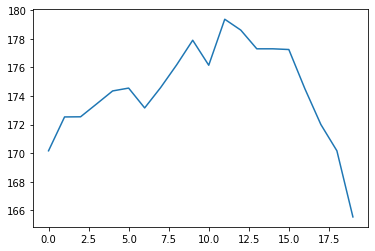

In [116]:
plt.plot(yt)
plt.show()

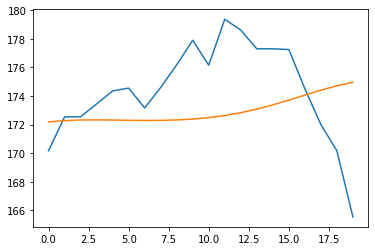

In [117]:
plt.plot(yt)
plt.plot(yhat)
plt.show()

In [0]:
import tensorflow as tf


In [118]:
mae = tf.keras.losses.MeanAbsoluteError()
mae(yt,yhat).numpy()

3.2593963